# Análise Multivariada e Aprendizado Não-Supervisionado

por Cibele Russo.

Adaptado de material de Fernando Vendrameto, Gustavo Sutter e Matheus Gomes

ICMC USP São Carlos.


## Aula 10b: Análise de Agrupamentos - Aplicação em Python



Vamos avaliar alguns indicadores sócios-económicos (inflação, PIB per capita, Crescimento do PIB e desemprego) dos países no ano de 2018, disponíveis na base de dados do Banco Mundial, World_Bank.csv.

1. Descreva os dados utilizando ferramentas descritivas e exploratórias adequadas,observando a natureza das variáveis presentes no conjunto de dados.

2. Desenvolva um agrupamento hierárqico via dendrograma. Determine o número de clusters adequado. Justifique sua resposta, identificando qual foi o critério utilizado.

3. Considere um subconjunto dos dados com os seguintes países:
    Brasil, China, Uruguai, Paraguai, Chile, Peru, Bolívia, Equador, Colombia, Alemanha, Estados Unidos, Reino Unido, Polônia.

    Desenvolva analises de agrupamentos utilizando técnicas hierárquicas e não hierárquicas. Justifique adequadamente a escolha da quantidade de grupos.
    


## Agrupamento hierárquico via dendrograma

In [ ]:
# ! pip install geopandas
#! pip install descartes

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
import geopandas

import warnings
warnings.filterwarnings('ignore')

sns.set()


In [77]:
df = pd.read_excel("/home/valdir/Documentos/CURSO_DNC/novo-curso-dnc/curso-dnc/MATERIAL-EXTRA/Analise_ML/Dados/world_bank.xls", index_col=0)
df.head()

,Region Code,Country Code,"GDP, PPP (current international $)","Population, total",Population CGR 1960-2015,Internet users (per 100 people),Popltn Largest City % of Urban Pop,"2014 Life expectancy at birth, total (years)","Literacy rate, adult female (% of females ages 15 and above)",Exports of goods and services (% of GDP)
Country Name,,,,,,,,,,
Aruba,MA,ABW,NaN,103889.0,0.011897,88.661227,NaN,75.451098,97.513962,NaN
Andorra,EU,AND,NaN,70473.0,0.030622,96.910000,NaN,NaN,NaN,NaN
Afghanistan,ME,AFG,6.291267e+10,32526562.0,0.023646,8.260000,0.533629,60.374463,23.873850,0.073278
Angola,AF,AGO,1.844377e+11,25021974.0,0.028724,12.400000,0.499538,52.266878,60.744801,0.373074
Albania,EU,ALB,3.266324e+10,2889167.0,0.010702,63.252933,0.273431,77.830463,96.769691,0.271050


In [78]:
df.shape

(264, 10)

In [79]:
bank = df.dropna()

In [80]:
bank.shape

(93, 10)

In [81]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, Afghanistan to Zimbabwe
Data columns (total 10 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Region Code                                                   93 non-null     object 
 1   Country Code                                                  93 non-null     object 
 2   GDP, PPP (current international $)                            93 non-null     float64
 3   Population, total                                             93 non-null     float64
 4   Population CGR 1960-2015                                      93 non-null     float64
 5   Internet users (per 100 people)                               93 non-null     float64
 6   Popltn Largest City % of Urban Pop                            93 non-null     float64
 7   2014 Life expectancy at birth, total (years)                  

In [82]:
bank2 = bank.iloc[2:, 4:]

In [83]:
bank2.head()

,Population CGR 1960-2015,Internet users (per 100 people),Popltn Largest City % of Urban Pop,"2014 Life expectancy at birth, total (years)","Literacy rate, adult female (% of females ages 15 and above)",Exports of goods and services (% of GDP)
Country Name,,,,,,
Albania,0.010702,63.252933,0.273431,77.830463,96.769691,0.271050
Argentina,0.013631,69.400921,0.381073,76.158610,98.134781,0.110578
Armenia,0.008765,58.249332,0.552238,74.675707,99.730469,0.297334
Azerbaijan,0.016621,77.000000,0.450271,70.763220,99.734520,0.378142
Burundi,0.025579,4.866224,0.557084,56.692024,82.912888,0.071030


In [85]:
bank2.describe()

,Population CGR 1960-2015,Internet users (per 100 people),Popltn Largest City % of Urban Pop,"2014 Life expectancy at birth, total (years)","Literacy rate, adult female (% of females ages 15 and above)",Exports of goods and services (% of GDP)
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,0.019881,38.821865,0.336577,69.143479,78.080686,0.351063
std,0.011471,25.941199,0.168826,8.266620,24.701211,0.234226
min,-0.001666,2.220165,0.031132,50.657780,11.015720,0.069071
25%,0.013409,17.755703,0.233948,62.734537,66.341072,0.210496
50%,0.022170,40.700000,0.318898,71.455878,91.840683,0.295318
75%,0.026288,62.741647,0.409084,75.113463,97.261730,0.444968
max,0.072615,92.884826,1.000000,83.078049,99.995827,1.764950


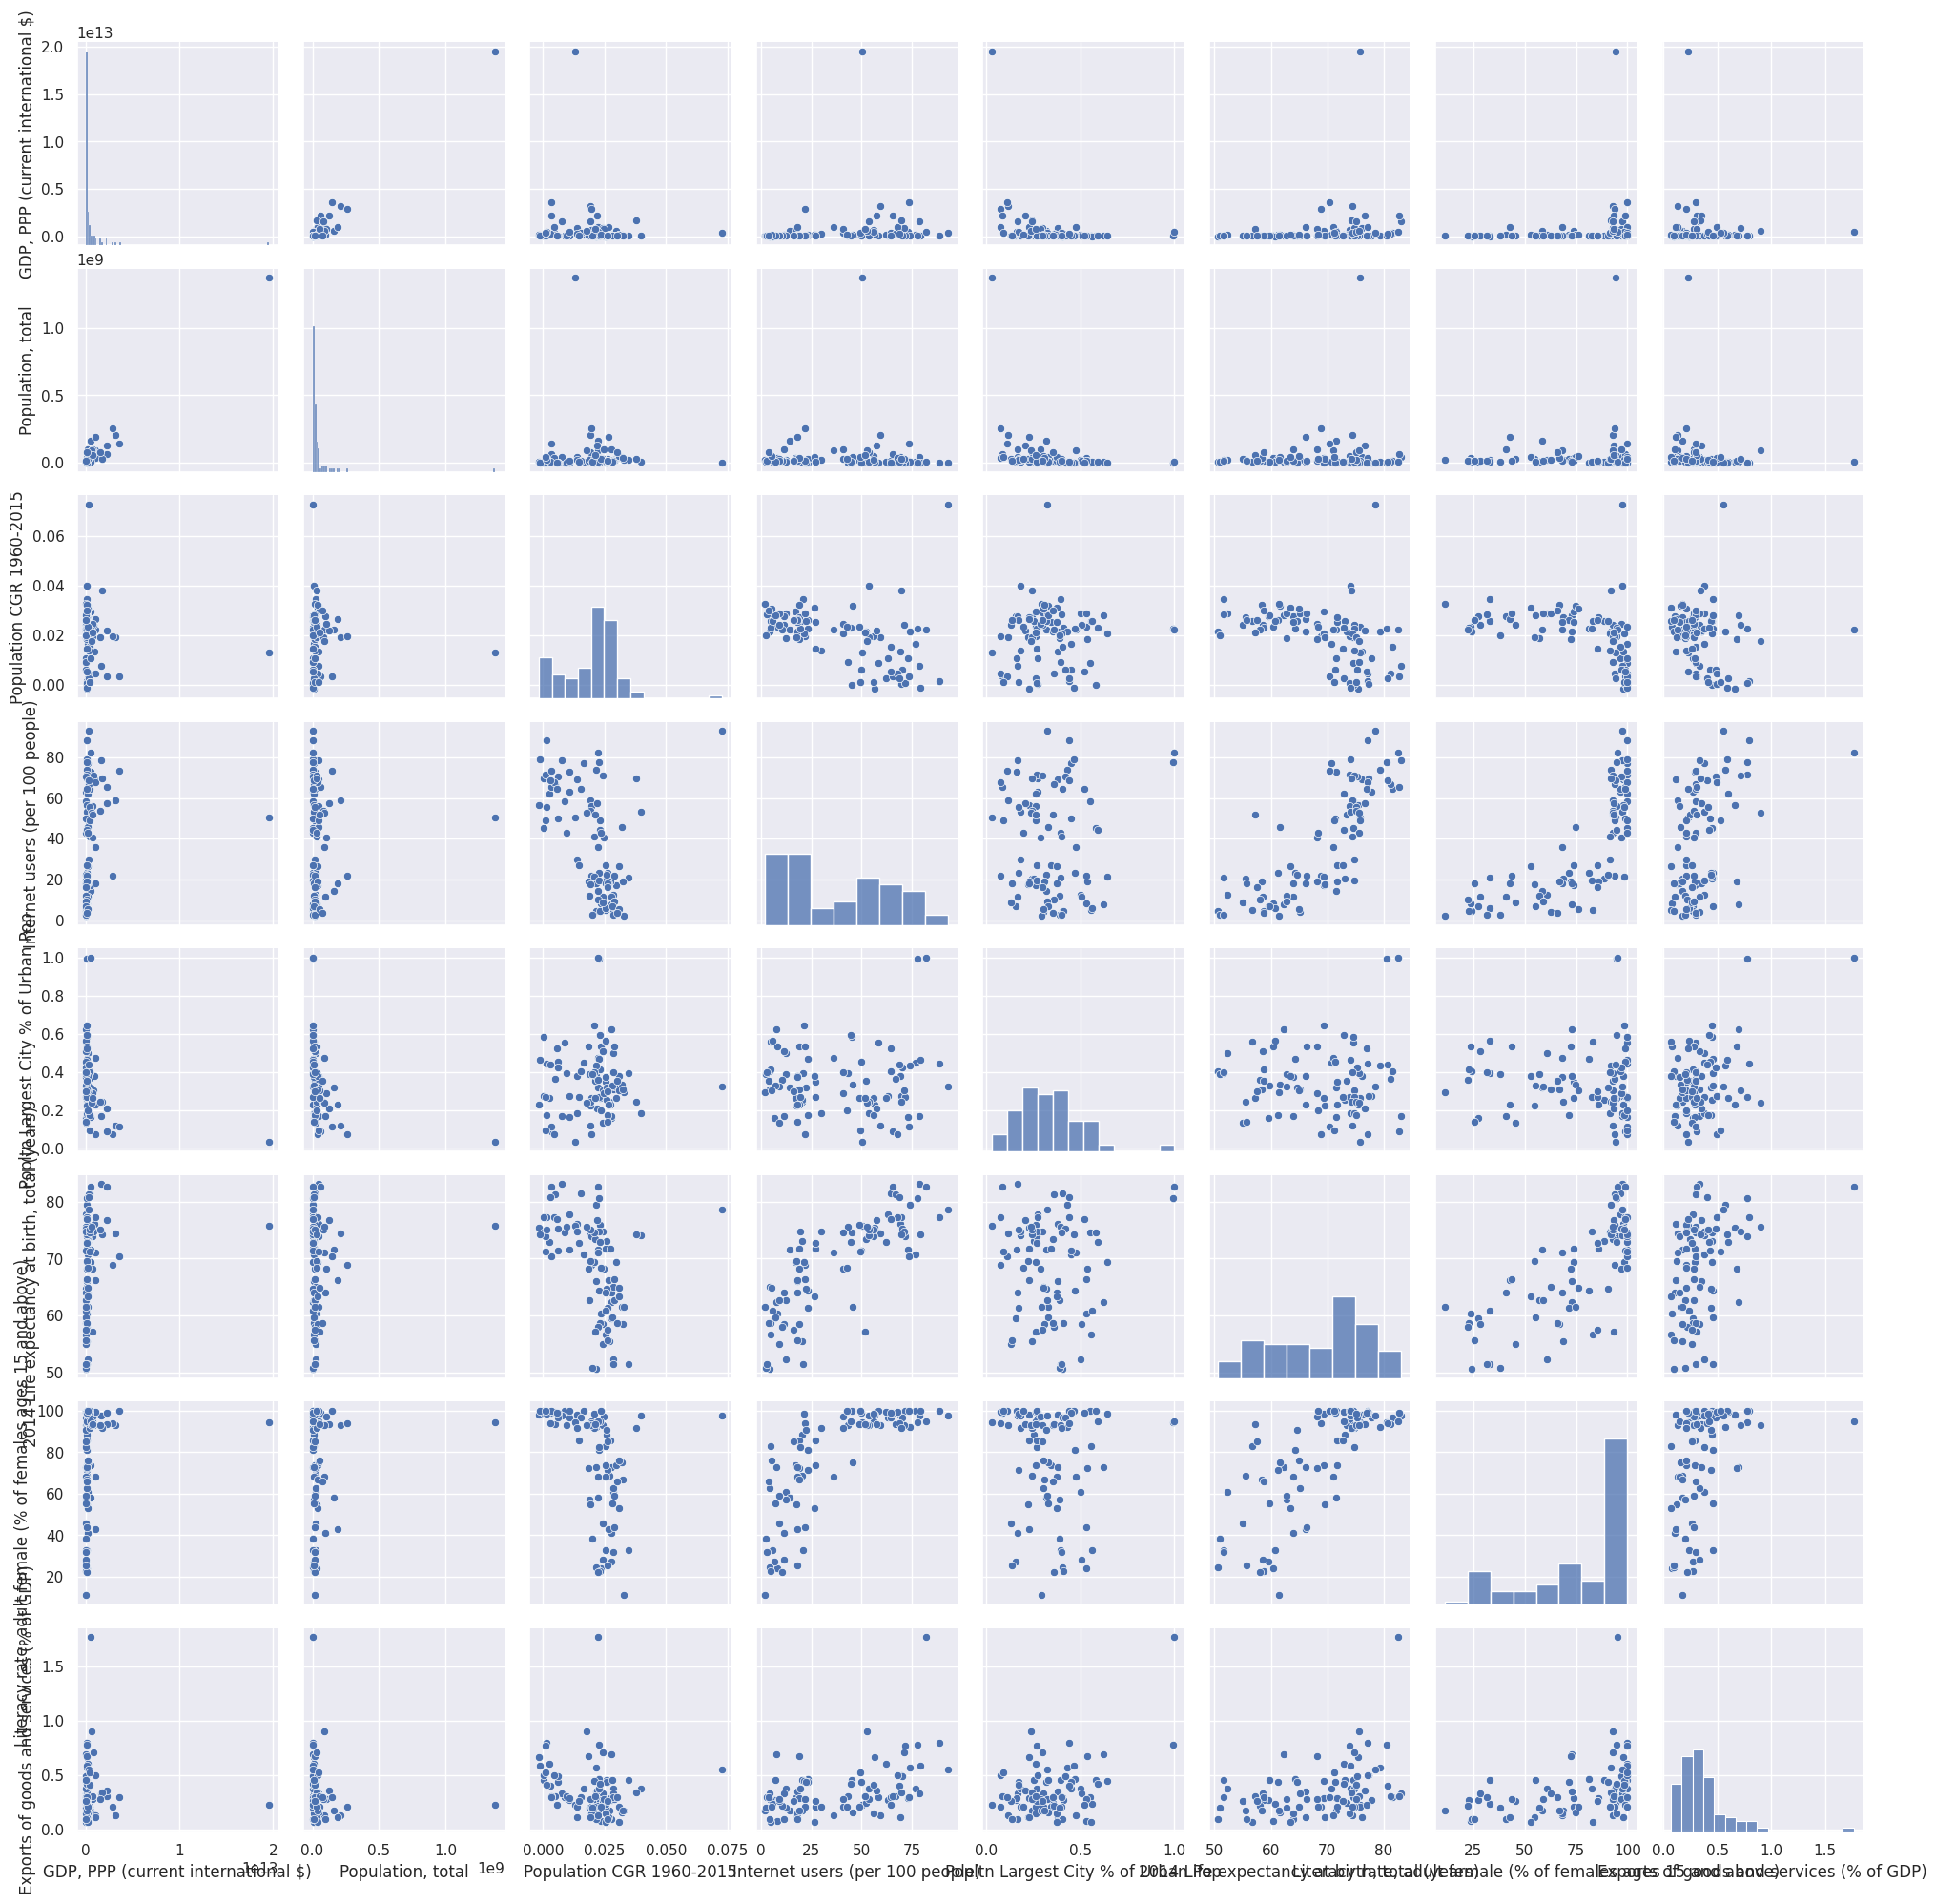

In [86]:
sns.pairplot(bank)

<AxesSubplot:>

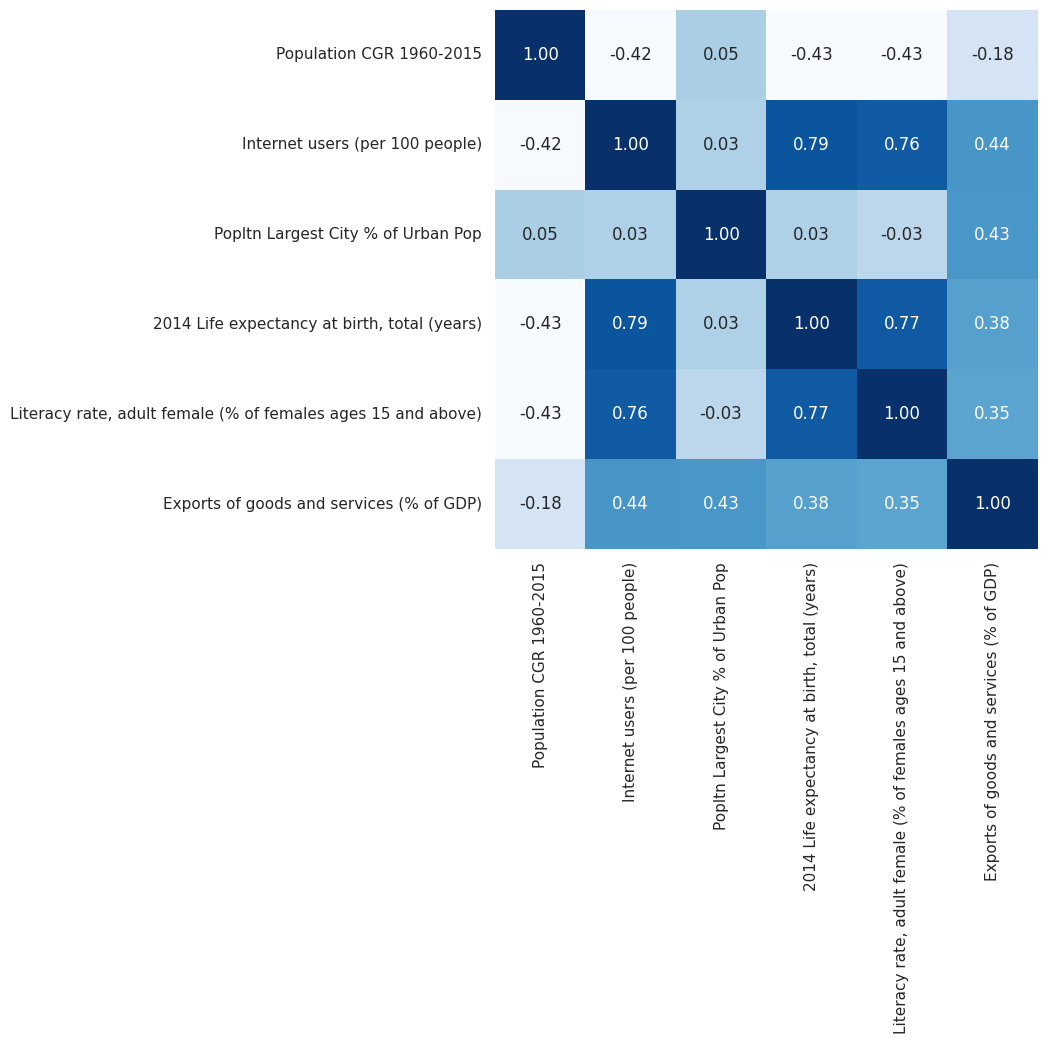

In [87]:
plt.figure(figsize=(7, 7))
corr = np.corrcoef(bank2.values, rowvar=False)
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', cbar=False, xticklabels=bank2.columns, yticklabels=bank2.columns)

In [115]:
df_scaled = bank2.copy()
df_scaled.iloc[:, :] = StandardScaler().fit_transform(bank2)
df_scaled.iloc[:, :]


,Population CGR 1960-2015,Internet users (per 100 people),Popltn Largest City % of Urban Pop,"2014 Life expectancy at birth, total (years)","Literacy rate, adult female (% of females ages 15 and above)",Exports of goods and services (% of GDP)
Country Name,,,,,,
Albania,-0.804634,0.947004,-0.376098,1.056673,0.760795,-0.343498
Argentina,-0.547904,1.185314,0.265024,0.853311,0.816365,-1.032408
Armenia,-0.974453,0.753053,1.284491,0.672932,0.881322,-0.230660
Azerbaijan,-0.285756,1.479872,0.677168,0.197023,0.881487,0.116251
Burundi,0.499443,-1.316198,1.313355,-1.514578,0.196710,-1.202189
...,...,...,...,...,...,...
Uzbekistan,0.304962,0.154202,-0.826677,-0.097853,0.892124,-0.619958
Vietnam,-0.182125,0.538723,-0.593715,0.788905,0.600973,2.347128
South Africa,0.109887,0.507679,-0.432780,-1.454963,0.624798,-0.180696


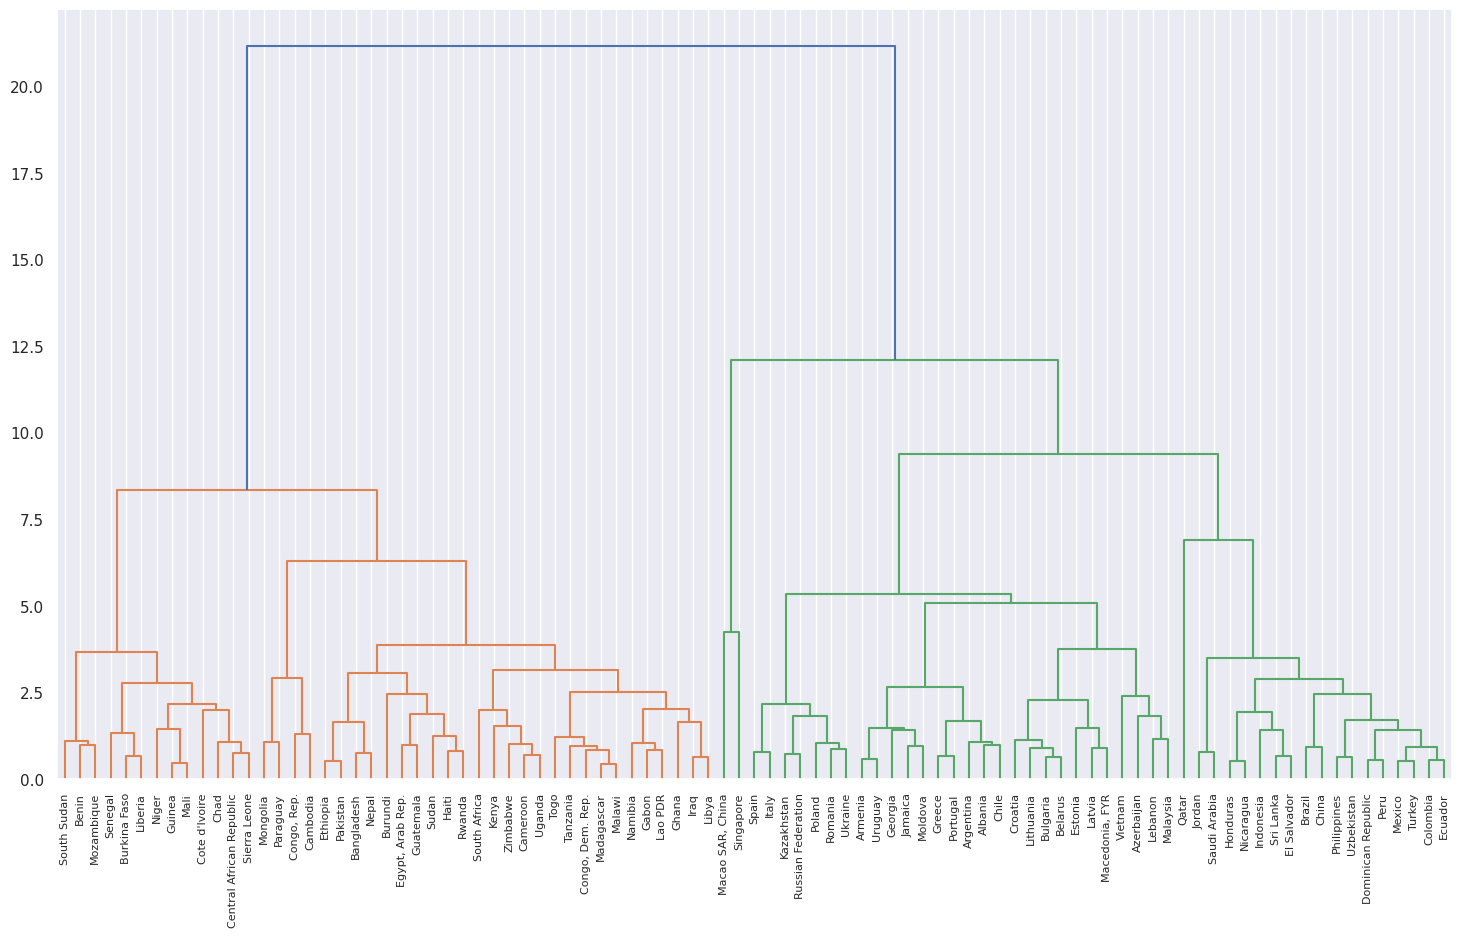

In [114]:
Z = hierarchy.linkage(df_scaled, 'ward')
plt.figure(figsize=(18, 10))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(bank2.index), leaf_font_size=8)

'Brazil',
                    'China',
                    'Uruguay',
                    'Paraguay',
                    'Chile',
                    'Peru',
                    'Bolivia',
                    'Ecuador',
                    'Colombia',
                    'Germany',
                    'United States',
                    'United Kingdom',
                    'Poland'

In [96]:
paises_interesse = bank2.index


df_paises = df_scaled.loc[paises_interesse, :]
print(df_paises.shape)


(91, 6)


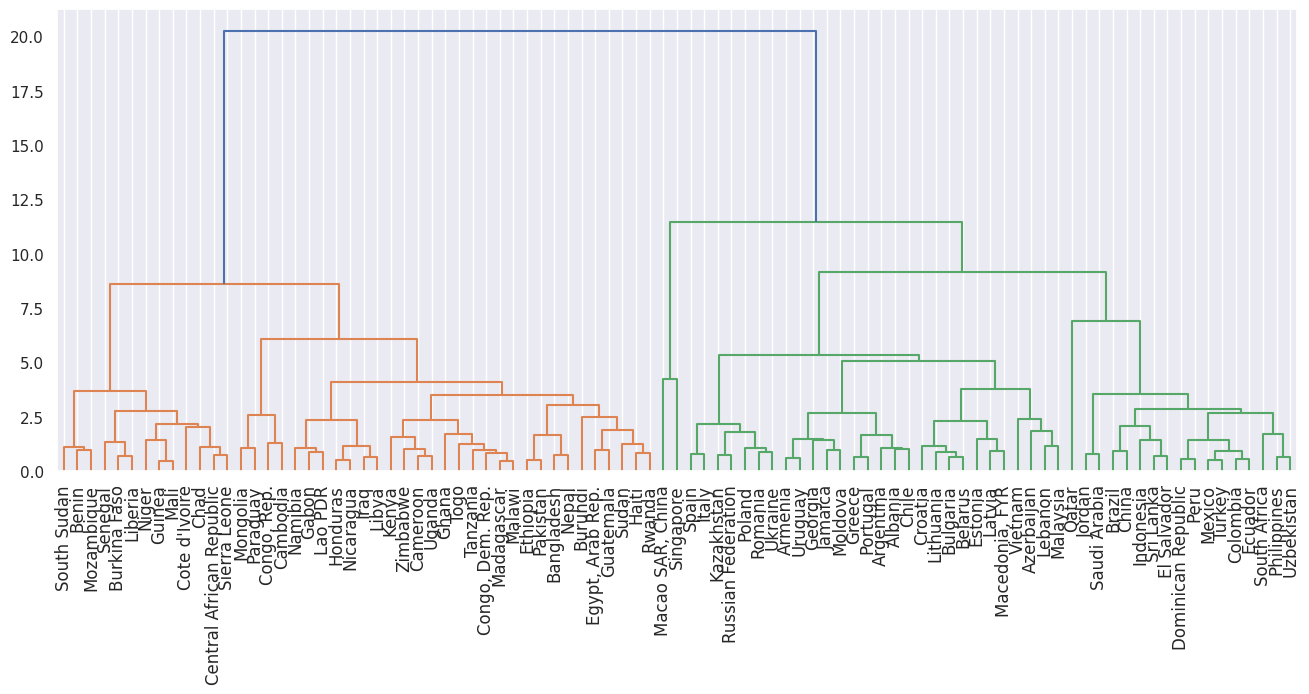

In [97]:
Z = hierarchy.linkage(df_paises, 'ward')
plt.figure(figsize=(16, 6))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(df_paises.index), leaf_font_size=12)



In [98]:
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
groups = cluster.fit_predict(df_paises)



In [99]:
groups

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1])

In [101]:
countries = list(df_paises.index)
grouped_countries = {i: [] for i in range(n_clusters)}
for country, group in zip(countries, groups):
    grouped_countries[group].append(country)

for gp, ctr in grouped_countries.items():
    print(f'Cluster {gp}: {ctr}\n')

Cluster 0: ['Albania', 'Argentina', 'Armenia', 'Azerbaijan', 'Bulgaria', 'Belarus', 'Brazil', 'Chile', 'China', 'Colombia', 'Dominican Republic', 'Ecuador', 'Spain', 'Estonia', 'Georgia', 'Greece', 'Croatia', 'Indonesia', 'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Lebanon', 'Sri Lanka', 'Lithuania', 'Latvia', 'Moldova', 'Mexico', 'Macedonia, FYR', 'Malaysia', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russian Federation', 'Saudi Arabia', 'El Salvador', 'Turkey', 'Ukraine', 'Uruguay', 'Uzbekistan', 'Vietnam', 'South Africa']

Cluster 1: ['Burundi', 'Benin', 'Burkina Faso', 'Bangladesh', 'Central African Republic', "Cote d'Ivoire", 'Cameroon', 'Congo, Rep.', 'Egypt, Arab Rep.', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'Guatemala', 'Honduras', 'Haiti', 'Iraq', 'Kenya', 'Cambodia', 'Lao PDR', 'Liberia', 'Libya', 'Madagascar', 'Mali', 'Mongolia', 'Mozambique', 'Malawi', 'Namibia', 'Niger', 'Nicaragua', 'Nepal', 'Pakistan', 'Paraguay', 'Rwanda', 'Sudan', 'Senegal', 'S

## Agrupamento não-hierárquico (K-médias)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7feb02479310>
Traceback (most recent call last):
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modul

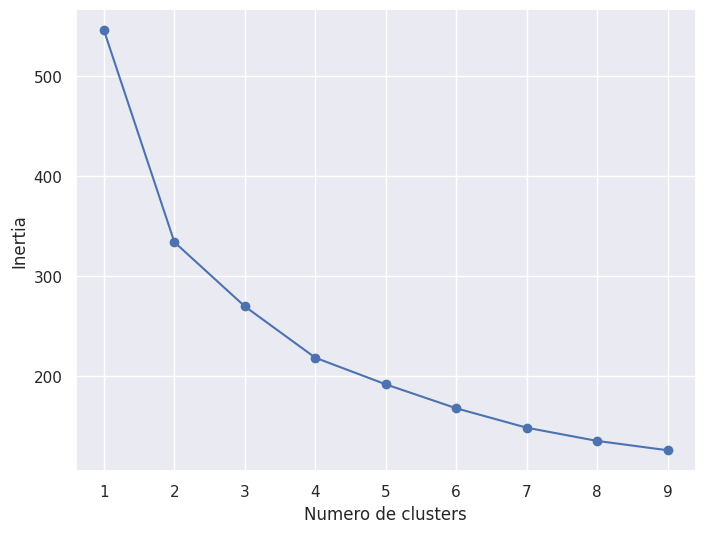

In [102]:
inertias = []
for k in np.arange(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_paises)
    inertias.append(kmeans.inertia_)

# Plotando o gráfico do Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 10), inertias, '-o')
plt.xlabel('Numero de clusters')
plt.ylabel('Inertia');

In [104]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)



In [106]:
df_scaled

,Population CGR 1960-2015,Internet users (per 100 people),Popltn Largest City % of Urban Pop,"2014 Life expectancy at birth, total (years)","Literacy rate, adult female (% of females ages 15 and above)",Exports of goods and services (% of GDP),cluster
Country Name,,,,,,,
Albania,-0.804634,0.947004,-0.376098,1.056673,0.760795,-0.343498,0
Argentina,-0.547904,1.185314,0.265024,0.853311,0.816365,-1.032408,0
Armenia,-0.974453,0.753053,1.284491,0.672932,0.881322,-0.230660,0
Azerbaijan,-0.285756,1.479872,0.677168,0.197023,0.881487,0.116251,0
Burundi,0.499443,-1.316198,1.313355,-1.514578,0.196710,-1.202189,1
...,...,...,...,...,...,...,...
Uzbekistan,0.304962,0.154202,-0.826677,-0.097853,0.892124,-0.619958,0
Vietnam,-0.182125,0.538723,-0.593715,0.788905,0.600973,2.347128,0
South Africa,0.109887,0.507679,-0.432780,-1.454963,0.624798,-0.180696,1


In [107]:
countries = list(df_scaled.index)
groups = df_scaled['cluster']

grouped_countries = {i: [] for i in range(n_clusters)}

for country, group in zip(countries, groups):
    grouped_countries[group].append(country)

for gp, ctr in grouped_countries.items():
    print(f'Cluster {gp}: {ctr}\n')



Cluster 0: ['Albania', 'Argentina', 'Armenia', 'Azerbaijan', 'Bulgaria', 'Belarus', 'Brazil', 'Chile', 'China', 'Colombia', 'Dominican Republic', 'Ecuador', 'Spain', 'Estonia', 'Georgia', 'Greece', 'Honduras', 'Croatia', 'Indonesia', 'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Lebanon', 'Sri Lanka', 'Lithuania', 'Latvia', 'Moldova', 'Mexico', 'Macedonia, FYR', 'Mongolia', 'Malaysia', 'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Paraguay', 'Qatar', 'Romania', 'Russian Federation', 'Saudi Arabia', 'El Salvador', 'Turkey', 'Ukraine', 'Uruguay', 'Uzbekistan', 'Vietnam']

Cluster 1: ['Burundi', 'Benin', 'Burkina Faso', 'Bangladesh', 'Central African Republic', "Cote d'Ivoire", 'Cameroon', 'Congo, Rep.', 'Egypt, Arab Rep.', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'Guatemala', 'Haiti', 'Iraq', 'Kenya', 'Cambodia', 'Lao PDR', 'Liberia', 'Libya', 'Madagascar', 'Mali', 'Mozambique', 'Malawi', 'Namibia', 'Niger', 'Nepal', 'Pakistan', 'Rwanda', 'Sudan', 'Senegal', 'Sierra Leone', 'S

In [108]:
# Dados de paises com informações para plotar

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[['name', 'geometry']]


In [109]:
world

,name,geometry
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...
172,Serbia,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Montenegro,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Kosovo,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Trinidad and Tobago,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [110]:
# Alguns paises possuem nomes diferentes nos dois conjutos, estamos corrigindo isso
world.loc[world['name'] == 'Brunei', 'name'] = 'Brunei Darussalam'
world.loc[world['name'] == "Côte d'Ivoire", 'name'] = "Cote d'Ivoire"
world.loc[world['name'] == "Czechia", 'name'] = "Czech Republic"
world.loc[world['name'] == "Dominican Rep.", 'name'] = "Dominican Republic"
world.loc[world['name'] == "Gambia", 'name'] = "Gambia, The"
world.loc[world['name'] == "Guinea", 'name'] = "Equatorial Guinea"
world.loc[world['name'] == "Russia", 'name'] = "Russian Federation"
world.loc[world['name'] == "United States of America", 'name'] ="United States"

In [112]:
# Juntando os dois conjuntos
all_data = pd.merge(world, df_scaled.reset_index(), how='left', left_on='name', right_on='index')

# Indicando os países que não temos dados (Serão plotados em preto)
all_data.loc[:, 'cluster'] = all_data.loc[:, 'cluster'].fillna(-1)

# Plotando o gráfico
all_data.plot(column='cluster', figsize=(18, 8), );

KeyError: 'index'